<a href="https://colab.research.google.com/github/Chekrouba-Tinhinane/Ds_miniProject/blob/main/DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This mini-project will focus on processing and replacing missing values in a dataset.
- Nous allons analyser un vrai Dataset de biens immobiliers: le "Ames Housing Dataset". A partir de ces données, nous allons développer un modèle prédictif permettant d'estimer le prix d'une maison à partir de nombreuses caractéristiques, telles que sa surface, le nombre de pièces, différents indices de qualité, etc.
- Réalisé par : Sonia RAAB et Tinhinane CHEKROUBA du groupe 05 .

# 1. Choose an existing dataset or generate a synthetic one.
- Pour mener à bien mon projet sur le traitement des valeurs manquantes, j'ai utilisé le jeu de données des prix des maisons d'Ames. Ce dataset est disponible sur Kaggle et est fréquemment utilisé pour des exercices de modélisation et d'analyse de données.
- Justification du choix :

     - Richesse des données : Le dataset contient 1460 observations de maisons avec 81 variables, offrant une diversité de caractéristiques telles que la superficie, le nombre de pièces, l'année de construction, etc.

     - Présence de valeurs manquantes : Plusieurs variables présentent des valeurs manquantes, ce qui est idéal pour appliquer et comparer différentes méthodes de traitement des données manquantes.

     - Objectif clair : Prédire le prix de vente des maisons (variable cible SalePrice), ce qui permet d'appliquer des modèles de régression et d'évaluer leur performance.


- Accès au dataset : Plus d'informations ici: https://www.kaggle.com/c/home-data-for-ml-course/overview/description


- Description générale :

Nombre d'observations : 1460

Nombre de variables : 81 (dont une variable cible SalePrice)

Types de variables : Numériques et catégorielles

Domaine : Immobilier résidentiel

- Détails sur les variables du dataset: https://github.com/titsitits/Python_Data_Science/blob/master/Donn%C3%A9es/data_description.txt


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
ames = pd.read_csv("sample_data/train.csv")
ames


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 2. Clean your data:
- Evaluate the quality of data :  
       On a 1460 observations (maisons), et 81 variables dont un Id et le prix de vente (SalePrice).
       19 variables contiennent des données invalides ou manquantes.
       Sur les 19 variables incomplètes, 3 sont des variables numériques (les variables de type "float64"), et les autres sont des variables catégorielles (les variables de type "object").

       Après vérification de la description des variables, on remarque que les variables catégorielles contiennent des "NA" comme catégories, et qui sont automatiquement interprétées comme des NaN par pandas.

       Pour les variables catégorielles, nous allons simplement remplacer les NaN par une catégorie "Nothing". Nous allons ensuite analyser et corriger chaque variable numérique.
  
- Identify relevant features : Pour savoir quelle sont les variables prédictives ona va faire une :
       Analyse de corrélation (variables continues).
       Analyse basique d'effet des variables continues.
       => Les résultats sont assez similaires. En réalité, les différences principales se trouvent pour les variables dont la distribution est fortement asymmétrique (e.g.: PoolArea est la plupart du temps 0, tout comme isnan_MasVnrArea)

-  Divide data into two parts one for experiments, another portion for validation (explain the logic of your splitting).
       Sélection des variables prédictives (features).
       Séparation des données d'entraînement et de validation
            

Dimensions du dataset :  (1460, 81) 

Résumé des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object

,PoolQC,MiscFeature,Alley,Fence,MasVnrType,FireplaceQu,LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,Electrical
0,7,54,91,281,588,770,1201,1379,1379,1379,1379,1379,1422,1422,1423,1423,1423,1452,1459


,LotFrontage,GarageYrBlt,MasVnrArea
0,1201,1379,1452


,median,mean
LotFrontage,,
False,159500.0,180770.480433
True,172400.0,181620.073359


,median,mean
GarageYrBlt,,
False,167500.0,185479.511240
True,100000.0,103317.283951


,median,mean
MasVnrArea,,
False,162700.0,180615.063361
True,203287.0,236484.250000


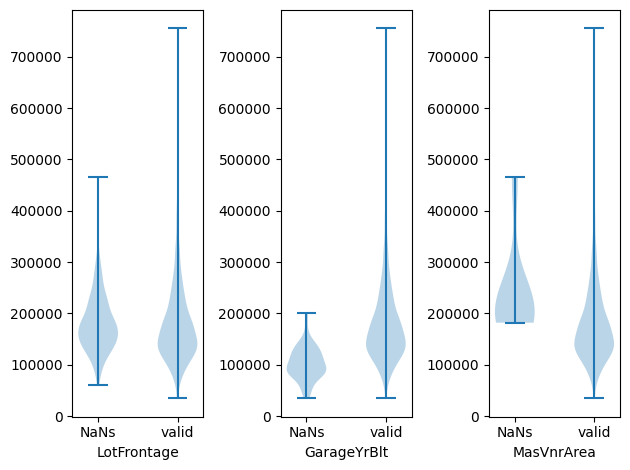

In [ ]:
# Dimensions du dataset
print("Dimensions du dataset : ", ames.shape , "\n")

# Aperçu des types de données et valeurs manquantes
print("Résumé des données :")
print(ames.info(), "\n")

# Nombre de valeurs manquantes par colonne
missing_values = ames.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Valeurs manquantes par colonne :")
print(missing_values, "\n")

# Pourcentage de valeurs manquantes
missing_percentage = (missing_values / len(ames)) * 100
missing_report = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
print("Rapport des valeurs manquantes :")
print(missing_report, "\n")




#Quelques fonctions utiles pour l'exploration

#Par soucis de lisibilité, on affichera les series comme des dataframes d'une ligne
def display_series(series):
  display(series.to_frame().transpose())

#Corrélation entre deux colonnes
def col_corr(df,col1,col2):
  return df[[col1,col2]].corr().values[0,1]

#Pour analyser l'effet d'une variable continue sur une autre, on peut extraire deux groupes (chaque côté de la médiane), et afficher un boxplot par groupe
def mediangroups_boxplot_comparison(df, group_col, comparison_col):
  df["above_median"] = df[group_col] > df[group_col].quantile(0.5)
  df.boxplot(comparison_col, by = "above_median")
  df.pop("above_median")

#Pour analyser l'effet d'une variable continue sur une autre, on peut extraire deux groupes (chaque côté de la médiane), et calculer la moyenne par groupe
def mediangroups_mean_comparison(df, group_col, comparison_col):
  means = df.groupby(df[group_col] > df[group_col].quantile(0.5))[comparison_col].mean()
  means.index = ['Below','Above']
  return means

#Idem en séparant les groupes avec la moyenne
def meangroups_mean_comparison(df, group_col, comparison_col):
  means = df.groupby(df[group_col] > df[group_col].mean())[comparison_col].mean()
  means.index = ['Below','Above']
  return means

print(ames.shape)
print(list(ames.columns))

#Colonnes incomplètes
counts = ames.count()
incomplete = counts[counts < len(ames)]
display_series(incomplete.sort_values())
len(incomplete.index)



#Correction de variables catégorielles
cat_columns = ames.columns[ames.dtypes == 'object']
for col in cat_columns:
  ames[col] = ames[col].fillna('Nothing')

#Exploration et correction des variables numériques
counts = ames.count()
incomplete = counts[counts < len(ames)]
display_series(incomplete.sort_values())

#Mean price for NaNs and for non-NaNs
display(ames.groupby(ames.LotFrontage.isna())["SalePrice"].agg(['median','mean']))
display(ames.groupby(ames.GarageYrBlt.isna())["SalePrice"].agg(['median','mean']))
display(ames.groupby(ames.MasVnrArea.isna())["SalePrice"].agg(['median','mean']))

from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,3)

for ax, feat in zip(axes, ['LotFrontage', 'GarageYrBlt','MasVnrArea']):
  ax.violinplot(dataset = [ames[ames[feat].isna()]['SalePrice'].values, ames[ames.notna()]['SalePrice'].values] )
  ax.set_xlabel(feat)
  ax.set_xticks([1,2])
  ax.set_xticklabels(['NaNs','valid'])

#Permet d'éviter l'overlap entre les subplots
plt.tight_layout()



array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

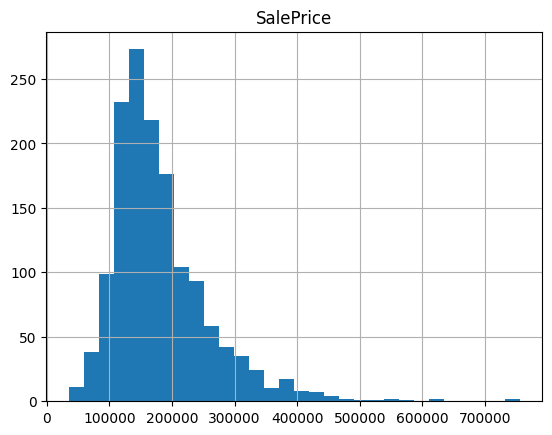

In [ ]:
ames.hist("SalePrice", bins = 30)

# 3. Exploratory Data Analyses

<ipython-input-5-17ea5f1be650>:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta_mean.append( means[1] - means[0] )


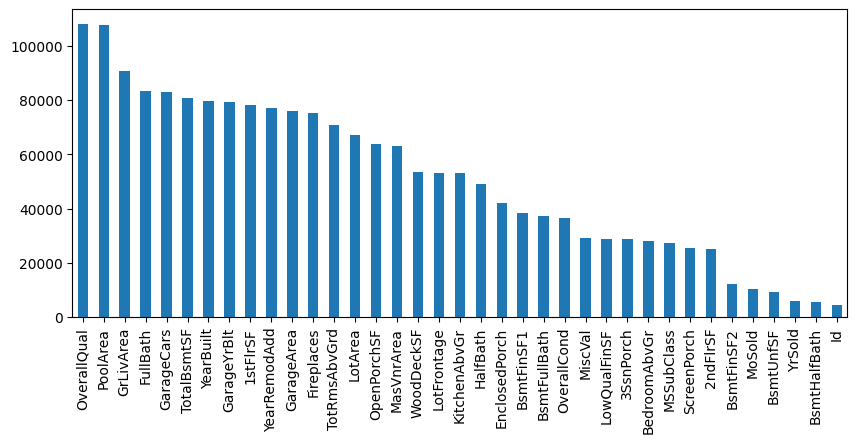

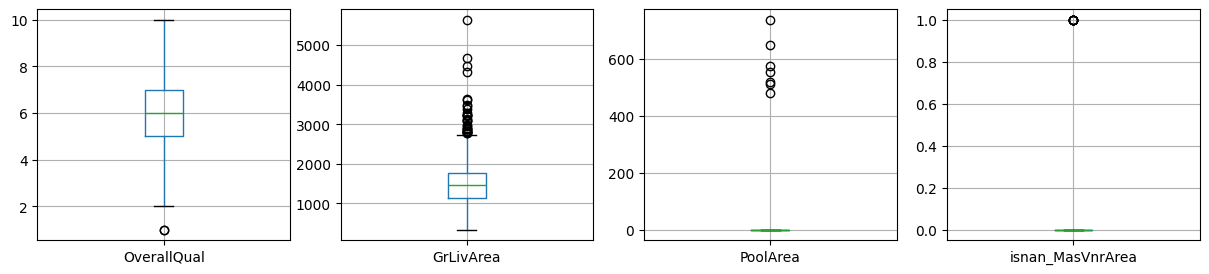

In [ ]:
def clean_df(df):
  #Fill categorical columns
  cat_columns = df.columns[df.dtypes == 'object']
  for col in cat_columns:
    df[col] = df[col].fillna('Nothing')

  #Clean MasVnrArea
  df["isnan_MasVnrArea"] = df.MasVnrArea.isna().astype(int)
  df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mean())

  #Clean LotFrontage
  df["isnan_LotFrontage"] = df.LotFrontage.isna().astype(int)
  df = df.drop("LotFrontage", axis=1)

  #Clean GarageYrBlt
  df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["YearBuilt"])

  #Suppression des variables inutiles
  out = df.pop("Id")

  return df


from matplotlib import pyplot as plt

# Select only numeric columns for correlation calculation
numeric_ames = ames.select_dtypes(include=['number'])

# Calculate correlations with 'SalePrice' for numeric columns only
corr_with_price = numeric_ames.corrwith(ames["SalePrice"])

# Continue with the rest of your code
best_features = corr_with_price.abs().sort_values(ascending=False)
best_features.pop("SalePrice")
best_features.plot.bar(figsize=(10,4))
best_features = best_features.index.to_list()

#Analyse de l'effet
continuous_col = ames.columns[(ames.dtypes == 'int64') | (ames.dtypes == 'float64')]

delta_mean = []

for col in list(continuous_col):
  means = meangroups_mean_comparison(ames, col, "SalePrice")
  delta_mean.append( means[1] - means[0] )

best_features_effects = pd.Series(delta_mean, continuous_col).abs().sort_values(ascending = False)
best_features_effects = best_features_effects.drop("SalePrice")
best_features_effects.plot.bar(figsize=(10,4))

best_features_effects = best_features_effects.index.to_list()

# Create the 'isnan_MasVnrArea' column before plotting
ames["isnan_MasVnrArea"] = ames.MasVnrArea.isna().astype(int) # This line was moved from the clean_df function

fig, axes = plt.subplots(1,4,figsize = (15,3))
ames.boxplot("OverallQual", ax = axes[0])
ames.boxplot("GrLivArea", ax = axes[1])
ames.boxplot("PoolArea", ax = axes[2])
ames.boxplot("isnan_MasVnrArea", ax = axes[3])



#-----------------------Préparation des sets d'entrennement et de validation --------------
#Sélection des variables prédictives (features)-------------------

#Prenons les cinq meilleures variables prédictives (en sa basant sur leur corrélation avec le prix, ou le delta de la moyenne)
featurelist = best_features[:5]
#featurelist = best_features_effects[:5]

X = ames[featurelist]
y = ames["SalePrice"]


# Select predictive features
featurelist = best_features[:5]
#featurelist = best_features_effects[:5]

# Create feature matrix X and target vector y
X = ames[featurelist]
y = ames["SalePrice"]

# Split data into training and validation sets
from sklearn.model_selection import train_test_split
import numpy as np

ids = ames.index
trainids, valids = train_test_split(ids, test_size = 0.4, random_state = 1)

# Create training and validation sets
Xtrain, Xval, ytrain, yval = X.loc[trainids], X.loc[valids], y.loc[trainids], y.loc[valids]




# 4. Data modeling:


R2 Scores (train, val): 0.7662346914049791 0.7477113803564559
biais: 143.587110776486
MAE: 25257.404730679427
RMSE: 40835.29225417493
20653.69101992036 21365.058307414154
Mean average error:  21365.058307414154


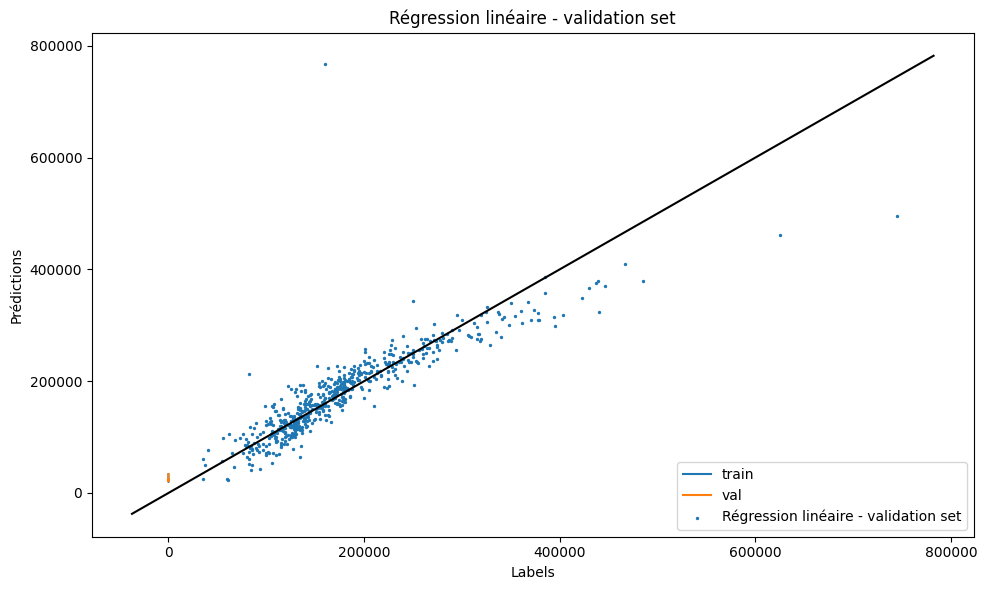

In [ ]:
from sklearn.linear_model import LinearRegression

price_predictor = LinearRegression()
price_predictor.fit(Xtrain, ytrain)


import numpy as np
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE


print("R2 Scores (train, val):", price_predictor.score(Xtrain, ytrain), price_predictor.score(Xval, yval))

y_pred = price_predictor.predict(Xval)

print("biais:", np.mean(y_pred - yval.values) ) #si il est négatif: sous-évaluation (en moyenne), si il est positif: sur-évaluation
print("MAE:", MAE(yval.values, y_pred) )
print("RMSE:", np.sqrt(MSE(yval.values, y_pred)) )

#Tester en gardant ou en retirant les outliers; tester avec différentes ensembles de variables

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the imputer

maes = pd.DataFrame(columns = ['train','val'])

for n in range(1,len(best_features)):

  #Choix des variables
  featurelist = best_features[:n]
  #featurelist = best_features_effects[:n]

  #Commencer par les plus mauvaises
  #featurelist = best_features[::-1][:n]
  #featurelist = best_features_effects[::-1][:n]

  X = ames[featurelist]
  y = ames["SalePrice"]

  Xtrain, Xval, ytrain, yval = X.loc[trainids], X.loc[valids], y.loc[trainids], y.loc[valids]

  # Impute missing values with the mean
  imputer = SimpleImputer(strategy='mean') # Create an imputer instance
  Xtrain = pd.DataFrame(imputer.fit_transform(Xtrain), columns=Xtrain.columns) # Fit and transform on training data
  Xval = pd.DataFrame(imputer.transform(Xval), columns=Xval.columns) # Transform validation data

  price_predictor.fit(Xtrain, ytrain)
  trainpred = price_predictor.predict(Xtrain)
  valpred = price_predictor.predict(Xval)

  maes.loc[n] = MAE(ytrain, trainpred), MAE(yval, valpred)

maes.plot()
plt.title("Performances (MAE) pour différents nombres de variables prédictives")
plt.xlabel("Nombre de variables prédictives")
plt.ylabel("Maen Absolute Error")


maes['val'].min(), maes['val'].idxmin()


#Meilleur résultat en validation
featurelist = best_features[:28]

X = ames[featurelist]
y = ames["SalePrice"]

Xtrain, Xval, ytrain, yval = X.loc[trainids], X.loc[valids], y.loc[trainids], y.loc[valids]

# Impute missing values using the mean before fitting the model
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
Xtrain = imputer.fit_transform(Xtrain)
Xval = imputer.transform(Xval)

price_predictor.fit(Xtrain, ytrain)
trainpred = price_predictor.predict(Xtrain)
valpred = price_predictor.predict(Xval)

def display_results(labels, predictions, title = "Model results", figsize = (10,6), **kwargs):

  print("Mean average error: ", MAE(labels, predictions))
  plt.scatter(labels, predictions, s=2, label = title, **kwargs)
  plt.gcf().set_size_inches(figsize)
  plt.title(title)
  plt.xlabel("Labels")
  plt.ylabel("Prédictions")
  prev_legend = plt.legend()
  plt.legend()
  xmin, xmax = plt.gca().get_xlim()
  plt.plot([xmin,xmax],[xmin,xmax], 'k')

print(MAE(ytrain, trainpred), MAE(yval, valpred))

display_results(yval, valpred, "Régression linéaire - validation set")
#Permet d'éviter l'overlap entre les subplots
plt.tight_layout()




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00
Mean average error:  21280.452581605397
Mean average error:  17282.989736612573


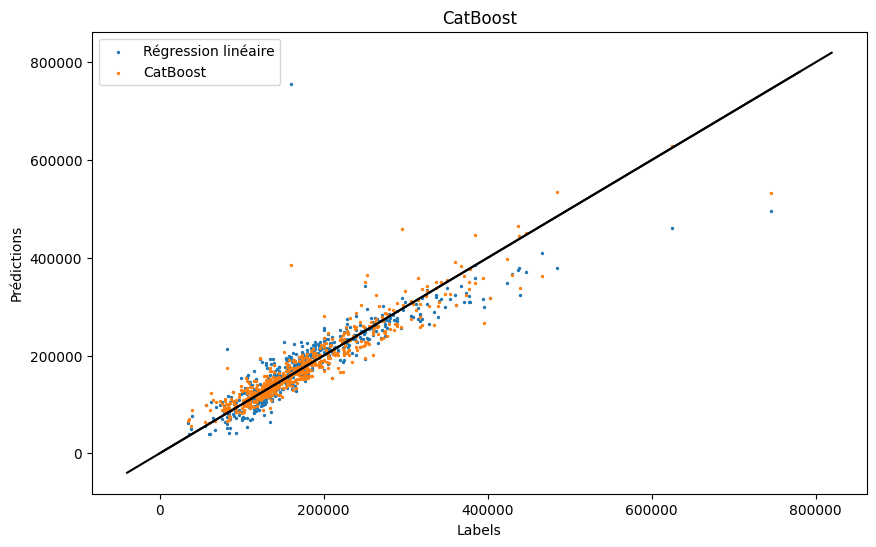

In [ ]:

#--------------------Un algorithme plus moderne: catboost--------
#Installer un nouveau package: on appelle une ligne de commande linux grâce au symbole "!". On utilise le gestionnaire de packages python pip pour installer un nouveau package
!pip install catboost

contfeatures = best_features[:28]

# Assuming 'best_cats' should contain best categorical features
# You need to define and populate 'best_cats' based on your feature selection criteria
# This is just an example, replace it with your actual logic
cat_columns = ames.select_dtypes(include=['object']).columns
# Example: selecting top 5 categorical features based on correlation with SalePrice
corr_with_price_cat = ames[cat_columns].apply(lambda x: pd.factorize(x)[0]).corrwith(ames["SalePrice"])
best_cats = corr_with_price_cat.abs().sort_values(ascending=False).index.tolist()[:5]

catfeatures = best_cats #on retire les plus mauvaises # You might need to adjust this if you change the number of selected categorical features
import numpy as np
from catboost import Pool, CatBoostRegressor

# Define newfeaturelist by combining contfeatures and catfeatures
newfeaturelist = contfeatures + catfeatures

cat_feature_ids = [i for i in range(len(newfeaturelist)) if newfeaturelist[i] in catfeatures]

X = ames[newfeaturelist] # Use newfeaturelist to select features for X
y = ames["SalePrice"]

#Since you re-defined X, you need to re-split your data.
from sklearn.model_selection import train_test_split
ids = ames.index
trainids, valids = train_test_split(ids, test_size = 0.4, random_state = 1)
Xtrain, Xval, ytrain, yval = X.loc[trainids], X.loc[valids], y.loc[trainids], y.loc[valids]



train_pool = Pool(Xtrain.values, ytrain.values, cat_features=cat_feature_ids)
val_pool = Pool(Xval, yval, cat_features=cat_feature_ids)
all_pool = Pool(X, y, cat_features=cat_feature_ids)

# Spécification des paramètres d'entraînement du modèle
model = CatBoostRegressor(iterations=300,
                          depth=3,
                          learning_rate=0.2,
                          loss_function='RMSE')
#Entraînement du modèle
model.fit(train_pool, silent=True)

# Réalisation de la prédiction en utilisant le modèle obtenu
trainpreds = model.predict(train_pool)
valpreds = model.predict(val_pool)

MAE(trainpreds,ytrain.values), MAE(valpreds,yval.values)

# Spécification des paramètres d'entraînement du modèle
model = CatBoostRegressor(iterations=300,
                          depth=3,
                          learning_rate=0.2,
                          loss_function='RMSE')

#Entraînement du modèle, avec un critère d'arrêt lorsque les performances en validation baissent: éviter le surentraînement (overfitting)
model.fit(train_pool,eval_set = val_pool, early_stopping_rounds = 100, silent = True)

# Réalisation de la prédiction en utilisant le modèle obtenu
trainpreds = model.predict(train_pool)
valpreds_catboost = model.predict(val_pool)

#Pour éviter de prédire des valeurs anormales, on limite les prédictions au range du set d'entraînement
trainpreds = trainpreds.clip(ytrain.min(), ytrain.max())
valpreds = valpreds.clip(ytrain.min(), ytrain.max())

MAE(trainpreds,ytrain.values), MAE(valpreds_catboost,yval.values)

# Define valpreds_lin before using it in display_results
# This calculation was performed in a previous cell,
# so you need to include it here or run the previous cell before this one.
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error as MAE

price_predictor = LinearRegression()

featurelist = best_features[:28]  # Assuming this is your feature list for linear regression
X = ames[featurelist]
y = ames["SalePrice"]
Xtrain, Xval, ytrain, yval = X.loc[trainids], X.loc[valids], y.loc[trainids], y.loc[valids]

imputer = SimpleImputer(strategy='mean')
Xtrain = imputer.fit_transform(Xtrain)
Xval = imputer.transform(Xval)

price_predictor.fit(Xtrain, ytrain)
valpreds_lin = price_predictor.predict(Xval).clip(ytrain.min(), ytrain.max())

# Now you can call display_results with valpreds_lin
display_results(yval.values, valpreds_lin, "Régression linéaire")
display_results(yval.values, valpreds_catboost, "CatBoost")

# 5. Communicate results:

<ipython-input-8-ced9e6d60aee>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest[col] = Xtest[col].fillna('missing')


<Axes: >

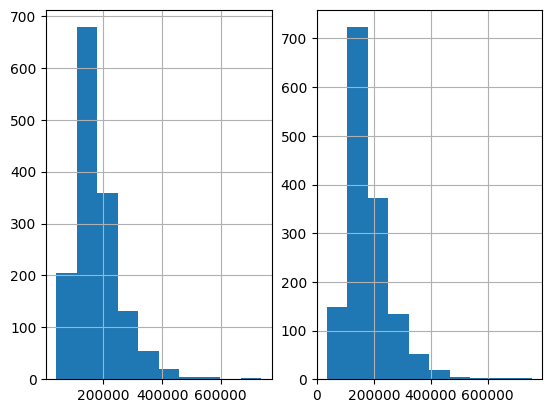

In [ ]:
# Vérifions déjà les performances sur le set de validation
#Régression linéaire

X = ames[featurelist]
y = ames["SalePrice"]

Xtrain, Xval, ytrain, yval = X.loc[trainids], X.loc[valids], y.loc[trainids], y.loc[valids]

# Impute missing values using the mean before fitting the model
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
Xtrain = imputer.fit_transform(Xtrain) # Fit and transform on training data
Xval = imputer.transform(Xval) # Transform validation data


price_predictor.fit(Xtrain, ytrain)

trainpreds = price_predictor.predict(Xtrain).clip(ytrain.min(), ytrain.max())
valpreds_lin = price_predictor.predict(Xval).clip(ytrain.min(), ytrain.max())

MAE(trainpreds,ytrain.values), MAE(valpreds_lin,yval.values)



#-----------------
testset = pd.read_csv("sample_data/train.csv")

# Define Xtest based on the features used in training
Xtest = testset[newfeaturelist]  # Assuming 'newfeaturelist' contains the features you want to use for prediction

# Impute missing values or replace NaNs with a string like 'missing' in categorical columns of Xtest
for col in catfeatures:
    if Xtest[col].isnull().any():
        # If you want to impute with a specific value (e.g., 'missing'):
        Xtest[col] = Xtest[col].fillna('missing')
        # If you want to use SimpleImputer for categorical features:
        # Xtest[col] = SimpleImputer(strategy='most_frequent').fit_transform(Xtest[[col]]).ravel()


test_pool = Pool(Xtest.values, cat_features=cat_feature_ids)

#Pour la soumission, on peut éventuellement réentraîner le modèle sur toutes les données d'entraînement et de validation (pour espérer avoir un modèle plus générique. Cependant: attention à l'overfitting sans critère d'arrêt)
model.fit(all_pool, silent = True)

#Prédictions
testpreds_catboost = model.predict(test_pool).clip(ytrain.min(), ytrain.max())

submission = ids.to_frame()
submission["SalePrice"] = testpreds_catboost
submission.to_csv("mysubmission_catboost.csv", index = False)

#Pour s'assurer de la plausibilité des résultats, on peut comparer leur distribution avec ceux du dataset d'entraînement
plt.subplot(1,2,1)
submission.SalePrice.hist()
plt.subplot(1,2,2)
ames.SalePrice.hist()